# EDA Nicoya planet image

The following is an exploration of the planet scope image structure
and bands visualizations.


In [1]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
import matplotlib.pyplot as plt

## Data import

In [2]:
image_path = "planet_images/20240210_161110_08_247d_3B_AnalyticMS.tif"
nicoya_raster = rasterio.open(image_path)

## Image information

 - I'm going to use GDAL to extract the image metadata

In [3]:
!gdalinfo $image_path

Driver: GTiff/GeoTIFF
Files: planet_images/20240210_161110_08_247d_3B_AnalyticMS.tif
       planet_images/20240210_161110_08_247d_3B_AnalyticMS.tif.aux.xml
Size is 11252, 7959
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 16N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 16N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-87,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
      

- This can also be done with some rasterio functions

In [4]:
type(nicoya_raster)

rasterio.io.DatasetReader

In [5]:
nicoya_raster.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 11252, 'height': 7959, 'count': 4, 'crs': CRS.from_epsg(32616), 'transform': Affine(3.0, 0.0, 662412.0,
       0.0, -3.0, 1133124.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [6]:
nicoya_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 11252,
 'height': 7959,
 'count': 4,
 'crs': CRS.from_epsg(32616),
 'transform': Affine(3.0, 0.0, 662412.0,
        0.0, -3.0, 1133124.0)}

## Image characteristics

In [7]:
# How many bands do I have?
nicoya_raster.count

4

In [8]:
# How many rows and columns do I have?
rows = nicoya_raster.height
columns = nicoya_raster.width
print(rows, columns)

7959 11252


In [9]:
# What is the CRS?
nicoya_raster.crs

CRS.from_epsg(32616)

In [10]:
# Check the values in the array
data = nicoya_raster.read()
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

 - The print of the array shows just 0s given that it's truncated
 - If we want to know min and max values we will need a couple of functions

In [11]:
# Get max, min values for first array
# First array is blue
min_val = data[0].min()
max_val = data[0].max()
print(f"Minimum value: {min_val}   Maximum value: {max_val}")

Minimum value: 0   Maximum value: 39769


- What does the values on the histogram mean?
- Do I have to scale values for analysis or just for plotting? 

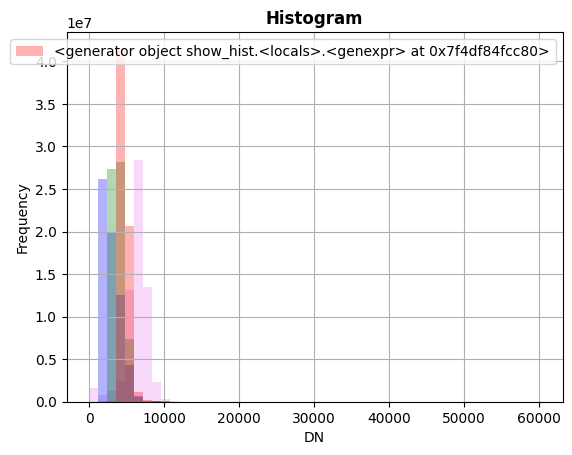

In [12]:
show_hist(nicoya_raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

## Plotting the image

 - At first, I want to check the image with true colors.
 - This is a Planet Scope product
 - Order of the image is blue, green, red, infrared [docs](https://developers.planet.com/docs/data/psscene/#4-band-asset-band-order)
 - Scaling needs to be done

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


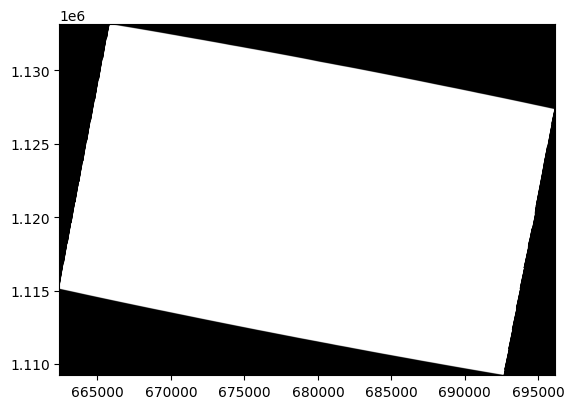

<Axes: >

In [13]:
show(nicoya_raster)

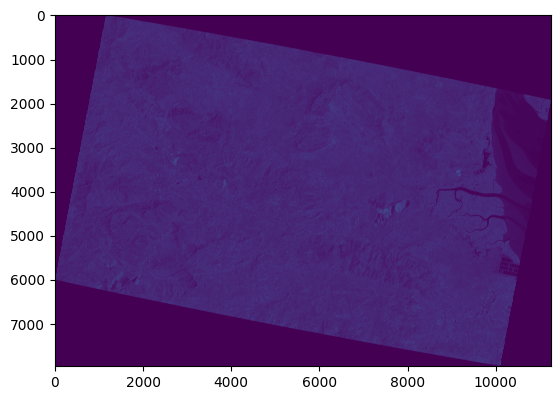

<Axes: >

In [14]:
rasterio.plot.show(
    nicoya_raster.read([4]) / 11000
)

# rasterio.plot.show(
#     nicoya_raster.read([3, 2, 1]) / 7000,
#     transform=nicoya_raster.transform
# )

 - There are two ways to plot images: rasterio and matplotlib.
 - Probably matplotlib have more options (not sure)

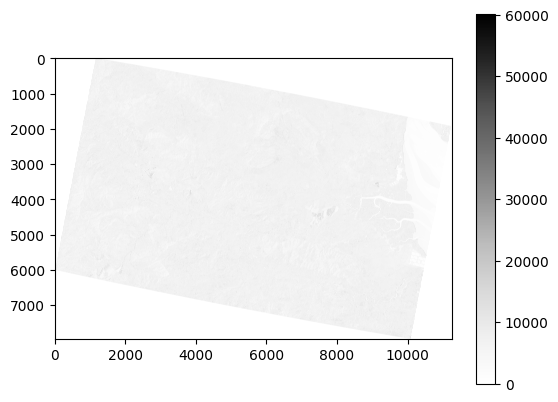

In [15]:
# Plot with a gray scale
fig = plt.imshow(data[3], cmap="Greys")

# Adding colorbar to the plot
plt.colorbar()

What I can think of that image:
 - Colorbar indicates there is a big range
 - If I want to enhance the picture, I need to scale the values

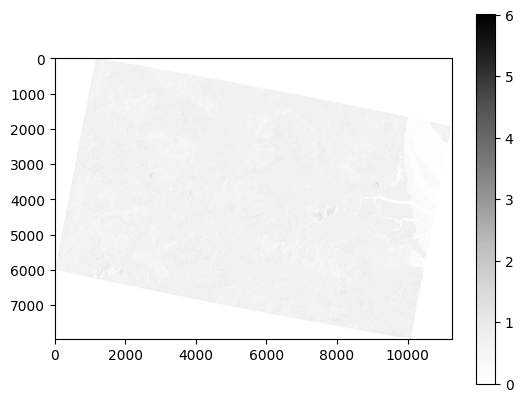

In [16]:
# Simple function to scale values
def scale(band):
    return band / 10000

# Read just the NIR band and scale it
nir = scale(nicoya_raster.read(4))

# Plot with a gray scale
fig = plt.imshow(nir, cmap="Greys")

# Adding colorbar to the plot
plt.colorbar()

- We can read the image with each of its bands as a numpy array
- Just need to remember the order of the bands (from docs of each sensor)
- Then, we can try to plot one true color image

In [17]:
# Unpack bands in individual numpy arrays
# blue, green, red, nir = nicoya_raster.read()

# Check just one
# red

In [18]:
# blue_scaled = scale(data[0])
# green_scaled = scale(data[1])
# red_scaled = scale(data[3])
# blue = data[0]
# green = data[1]
# red = data[2]

# rgb = np.dstack((red, green, blue))



In [19]:
# plt.imshow(rgb)

 - Pay attention to msg where it states that image have been clipped from 0 to 1 in case of floats of from 0 to 255 for integers.
 - From the first section of this document, we saw that the range of the values is much greater.
 - To solve this we need to create a transformation of the values.
 - We have a uint16 array

In [20]:
# Let's check one of the bands values
# plt.figure()
# plt.hist(red.flatten(), bins=50)
# ds = None

In [21]:
# We are going to apply a min-max normalization
def scale_min_max(x):
    return((x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x)))

red_scaled = scale_min_max(data[2])
blue_scaled = scale_min_max(data[0])
green_scaled = scale_min_max(data[1])

rgb_scaled = np.dstack((red_scaled, green_scaled, blue_scaled))

In [22]:
plt.figure()
plt.imshow(rgb_scaled)
plt.show()

: 